In [45]:
import cv2
from matplotlib import pyplot as plt

In [46]:
# Load the images.
img0 = cv2.imread("44.jpg",
 cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread("33.png",
 cv2.IMREAD_GRAYSCALE)

In [47]:
# Perform ORB feature detection and description.
orb = cv2.ORB_create()

In [48]:
kp0, des0 = orb.detectAndCompute(img0, None)
kp1, des1 = orb.detectAndCompute(img1, None)

In [49]:
# Perform brute-force matching.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des0, des1)

In [50]:
# Sort the matches by distance.
matches = sorted(matches, key=lambda x:x.distance)

In [55]:
# Draw the best 25 matches.
img_matches = cv2.drawMatches(
img0, kp0, img1, kp1, matches[:30], img1,
flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

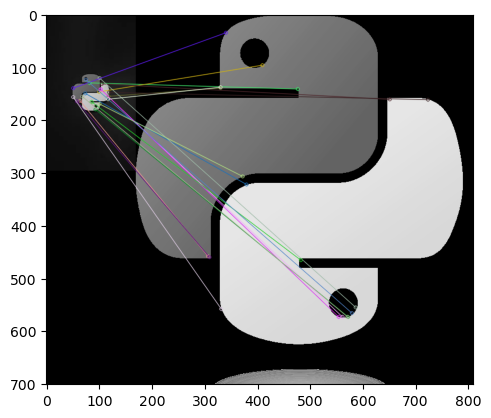

In [56]:
# Show the matches.
plt.imshow(img_matches)
plt.show()

# Matching with FLANN

In [57]:
kp_0, des_0 = orb.detectAndCompute(img0, None)
kp_1, des_1 = orb.detectAndCompute(img1, None)

In [83]:
FLANN_INDEX_LSH = 6

index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des_0,des_1,k=5)

In [84]:
# Prepare an empty mask to draw good matches.
mask_matches = [[0, 0] for i in range(len(matches))]

# Populate the mask based on David G. Lowe's ratio test.
for i, m_n in enumerate(matches):
    if len(m_n) != 2:
        continue
    (m,n) = m_n
    
    if m.distance < 0.6 * n.distance:
        mask_matches[i]=[1, 0]

In [85]:
# Draw the matches that passed the ratio test.
img_matches = cv2.drawMatchesKnn(
img0, kp0, img1, kp1, matches, None,
matchColor=(0, 255, 0), singlePointColor=(255, 0, 0),
matchesMask=mask_matches, flags=0)

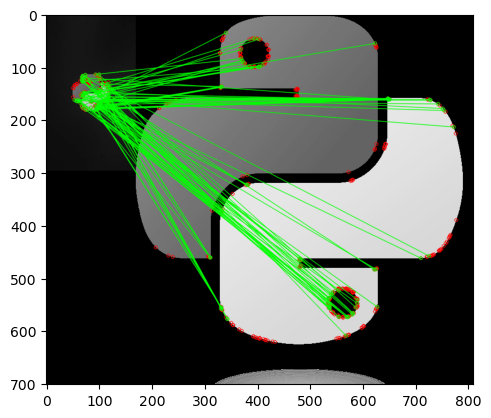

In [86]:
# Show the matches.
plt.imshow(img_matches)
plt.show()